# 1. Introduction

Name    : Azhar Muhammad

Batch   : RMT-042

Project ini bertujuan untuk analisis dan pemodelan data terkait pasien kanker dari berbagai negara. Dataset mencakup informasi seperti jenis kanker, stadium, jenis kelamin, biaya perawatan, dan faktor risiko. Tujuan dari proyek ini adalah membangun model machine learning yang dapat memprediksi tingkat keparahan pasien kanker (target_severity_score) berdasarkan fitur-fitur yang tersedia, dengan harapan dapat membantu pengambilan keputusan medis yang lebih efektif.

# 2. Import Libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from phik import phik_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint, uniform


# 3. Data Loading

## Load File

In [2]:
# load file

df = pd.read_csv(r'E:\FTDS\p1-ftds042-rmt-m2-azharmuhammad-3124\global_cancer_patients_2015_2024.csv')
df

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


## Make Column Names in Lowercase

In [3]:
# merubah nama kolom menjadi huruf kecil

df.columns = [col.lower() for col in df.columns]

# 4. Exploratory Data Analysis

## Average Treatment Cost (USD) by Country

In [4]:
# groupby country dan treatment cost

country_treatment_cost = df.groupby('country_region')['treatment_cost_usd'].mean()
country_treatment_cost

country_region
Australia    52621.637121
Brazil       52540.892254
Canada       52584.225541
China        52899.413814
Germany      52769.251439
India        52284.925133
Pakistan     51567.959389
Russia       52319.453980
UK           52199.851308
USA          52878.648158
Name: treatment_cost_usd, dtype: float64

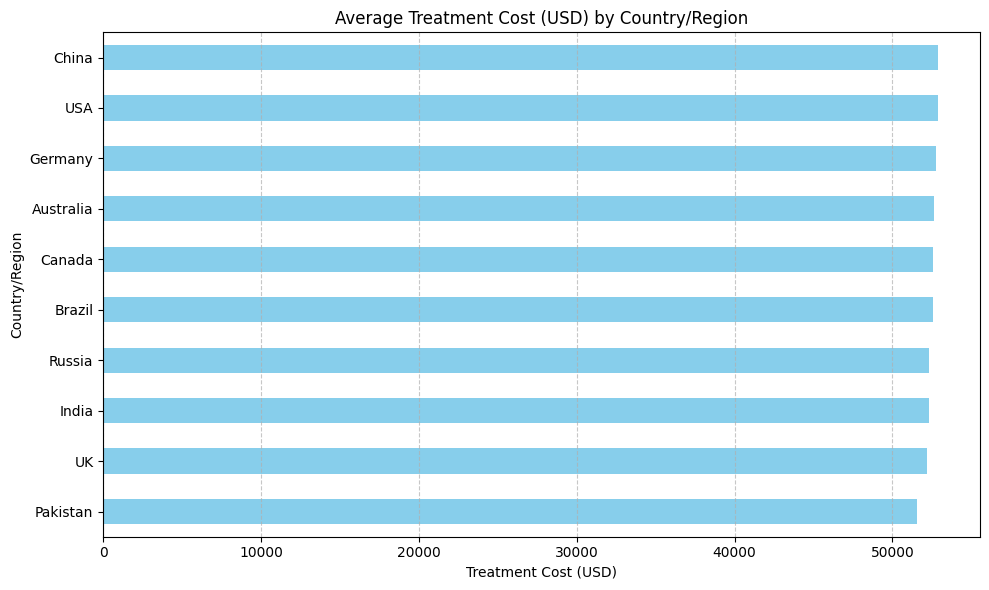

In [5]:
# viualisasi

plt.figure(figsize=(10, 6))
country_treatment_cost.sort_values().plot(kind='barh', color='skyblue')
plt.title("Average Treatment Cost (USD) by Country/Region")
plt.xlabel("Treatment Cost (USD)")
plt.ylabel("Country/Region")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Cancer Stage Value

In [6]:
# menghitung jumlah value cancer stage

cancer_stage_nunique = df['cancer_stage'].value_counts()
cancer_stage_nunique

cancer_stage
Stage II     10124
Stage I      10046
Stage III    10008
Stage IV      9933
Stage 0       9889
Name: count, dtype: int64

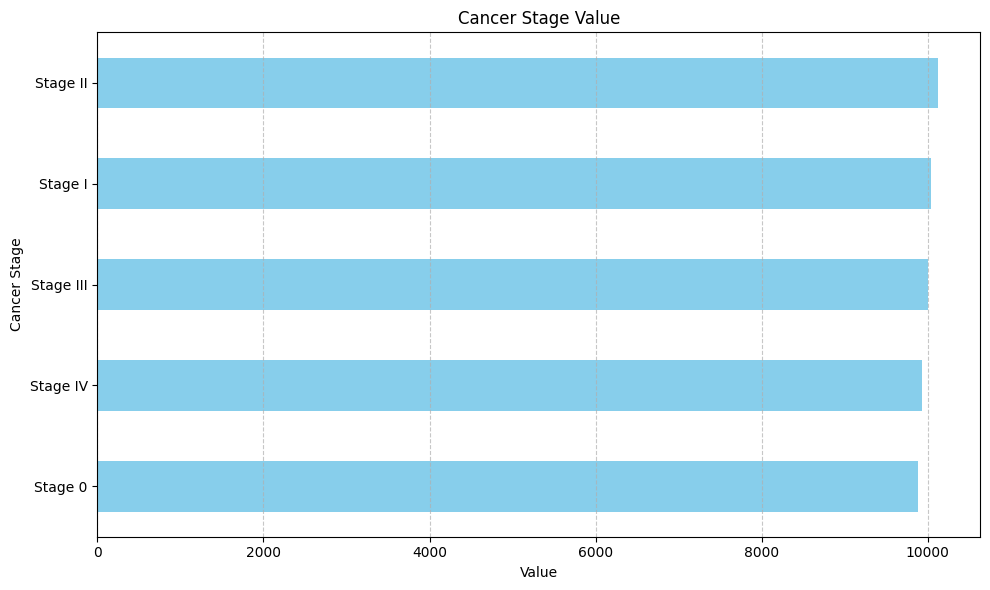

In [7]:
# viusalisasi

plt.figure(figsize=(10, 6))
cancer_stage_nunique.sort_values().plot(kind='barh', color='skyblue')
plt.title("Cancer Stage Value")
plt.xlabel("Value")
plt.ylabel("Cancer Stage")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Cancer Type by Gender

In [8]:
# groupby gender dan cancer_type

gender_cancer_type = df.groupby('gender')['cancer_type'].value_counts()
gender_cancer_type

gender  cancer_type
Female  Cervical       2160
        Prostate       2113
        Colon          2108
        Leukemia       2081
        Lung           2067
        Skin           2065
        Liver          2064
        Breast         2051
Male    Colon          2147
        Prostate       2138
        Skin           2117
        Lung           2103
        Leukemia       2092
        Liver          2091
        Breast         2080
        Cervical       2028
Other   Colon          2121
        Liver          2094
        Leukemia       2093
        Breast         2058
        Prostate       2057
        Skin           2049
        Cervical       2034
        Lung           1989
Name: count, dtype: int64

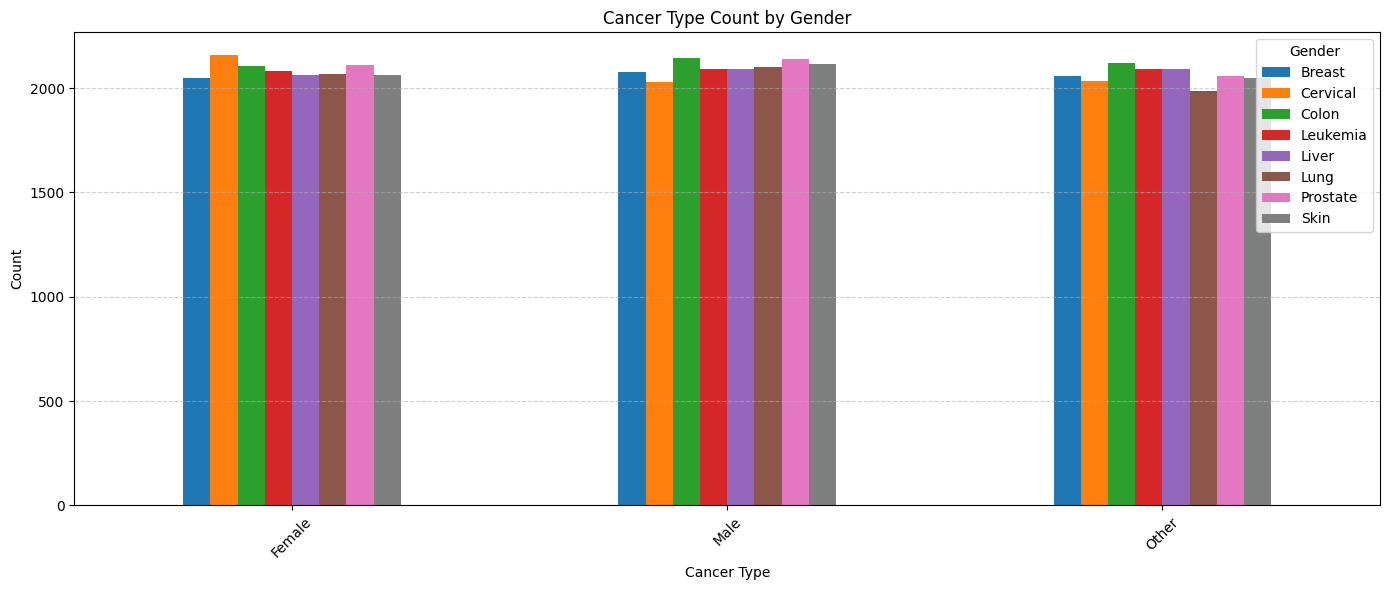

In [9]:
# visualisasi

gender_cancer_type_df = gender_cancer_type.unstack().fillna(0)
gender_cancer_type_df.plot(kind='bar', figsize=(14, 6)) 
plt.title("Cancer Type Count by Gender")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Data Distribution

In [10]:
# melihat distribusi data numerik

df.select_dtypes(include='number').drop(columns=['target_severity_score']).describe()

,age,year,genetic_risk,air_pollution,alcohol_use,smoking,obesity_level,treatment_cost_usd,survival_years
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000


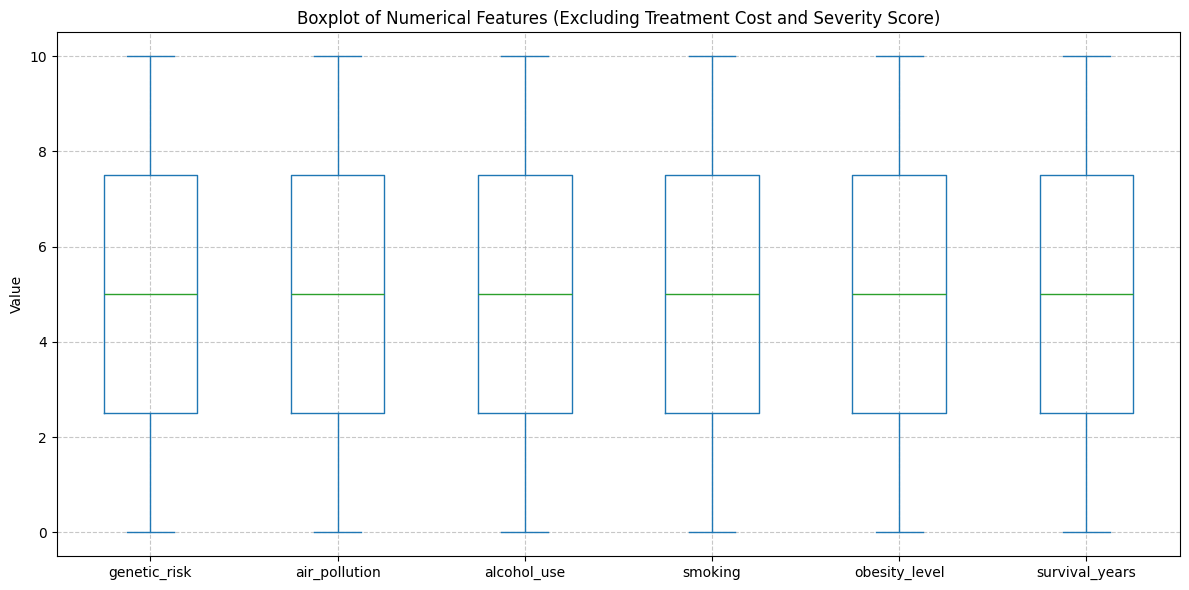

In [11]:
# viualisasi

cols_to_plot = df.select_dtypes(include='number').drop(columns=['treatment_cost_usd', 'target_severity_score', 'year', 'age'])

cols_to_plot.plot(kind='box', figsize=(12, 6))
plt.title('Boxplot of Numerical Features (Excluding Treatment Cost and Severity Score)')
plt.ylabel('Value')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## EDA Analysis

### Average Treatment Cost (USD) by Country

Tidak ada perbedaan rata-rata biaya treatment antar negara. Sedangkan negara-negara tersebut seharusnya memiliki rata-rata biaya treatment yang berbeda. Ini contoh range kasar dari *google.com*:


- UK        :	$0 (public) – $50,000+ (private)
- India     :	$1,100 – $34,650
- Brazil    :	$4,100 – $12,900+
- Australia :	$0 (public) – $40,000+ (private)
- USA       :	$10,000 – $200,000+


### Cancer Stage Value

Value pada cancer stage harusnya juga tidak seimbang, sama seperti yang kita lihat di `Average Treatment Cost (USD) by Country`. Data tidak menunjukkan kenyataan dilapangan.

### Cancer Type by Gender

Sama seperti dua EDA pertama, data terlalu seimbang. Contoh kasus di USA, perbandingan antara pria dan wanita yang terkena breast cancer adalah 1:106. Source: [Breast Cancer Facts & Figures 2023](https://www.cancer.org/cancer/types/breast-cancer/about/how-common-is-breast-cancer.html). Sedangkan dataset menunjukkan perbandingan antara pria dan wanita yang seimbang. Pria dan wanita memiliki kerentanan terhadap jenis kanker tertentu, namun data tidak memperlihatkan adanya perbedaan yang signifikan antara keduanya.

### Data Distribution

Distribusi simetris, rentang nilai yang seragam, dan minimnya outlier. Kemungkinan besar, pembuat dataset telah melakukan cleaning data terlebih dahulu sebelum dataset tersebut diunggah. Kemungkinan ini juga didukung oleh poin-poin EDA diatas.

# 5. Feature Engineering

## Split Feature (x) and Target (y)

In [12]:
# split x dan y

x = df.drop(['target_severity_score'],axis=1)
y = df.target_severity_score 

## Split Numerical and Categorical Columns

In [13]:
# split kolom numerik dan kategorikal

num_cols = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = x.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: ['age', 'year', 'genetic_risk', 'air_pollution', 'alcohol_use', 'smoking', 'obesity_level', 'treatment_cost_usd', 'survival_years']
Categorical Columns: ['patient_id', 'gender', 'country_region', 'cancer_type', 'cancer_stage']


## Cardinality Check for Categorical Columns

In [14]:
# cek cardinality

x[cat_cols].nunique()

patient_id        50000
gender                3
country_region       10
cancer_type           8
cancer_stage          5
dtype: int64

## Missing Value Check

In [15]:
# cek missing value

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          50000 non-null  object 
 1   age                 50000 non-null  int64  
 2   gender              50000 non-null  object 
 3   country_region      50000 non-null  object 
 4   year                50000 non-null  int64  
 5   genetic_risk        50000 non-null  float64
 6   air_pollution       50000 non-null  float64
 7   alcohol_use         50000 non-null  float64
 8   smoking             50000 non-null  float64
 9   obesity_level       50000 non-null  float64
 10  cancer_type         50000 non-null  object 
 11  cancer_stage        50000 non-null  object 
 12  treatment_cost_usd  50000 non-null  float64
 13  survival_years      50000 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 5.3+ MB


## Outliers Check for Numerical Columns

In [16]:
# membuat fungsi untuk cek outliers

def count_outliers_iqr(df):
    result = []

    numeric_df = df.select_dtypes(include='number')

    for col in numeric_df.columns:
        Q1 = numeric_df[col].quantile(0.25)
        Q3 = numeric_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outlier_count = numeric_df[(numeric_df[col] < lower) | (numeric_df[col] > upper)].shape[0]
        percent = round(outlier_count / df.shape[0] * 100, 2)
        result.append((col, outlier_count, percent))

    return pd.DataFrame(result, columns=['Column', 'Outliers', 'Percentage'])

outlier_stats = count_outliers_iqr(x)
print(outlier_stats)


               Column  Outliers  Percentage
0                 age         0         0.0
1                year         0         0.0
2        genetic_risk         0         0.0
3       air_pollution         0         0.0
4         alcohol_use         0         0.0
5             smoking         0         0.0
6       obesity_level         0         0.0
7  treatment_cost_usd         0         0.0
8      survival_years         0         0.0


## Feature Selection

In [17]:
# menghitung korelasi feature dengan target

interval_cols = [
    'age', 'genetic_risk', 'air_pollution', 'alcohol_use', 'smoking',
    'obesity_level', 'treatment_cost_usd', 'survival_years', 'target_severity_score'
]

phik_corr = df.phik_matrix(interval_cols=interval_cols)
print(phik_corr[['target_severity_score']].sort_values(by='target_severity_score', ascending=False))

c:\Users\Azhar Muhammad\miniconda3\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable patient_id is large: 50000. Are you sure this is not an interval variable? Analysis for pairs of variables including patient_id can be slow.
  warnings.warn(


                       target_severity_score
patient_id                          1.000000
target_severity_score               1.000000
smoking                             0.481591
genetic_risk                        0.478287
treatment_cost_usd                  0.464905
air_pollution                       0.375832
alcohol_use                         0.369724
obesity_level                       0.261087
gender                              0.006171
cancer_type                         0.005339
age                                 0.000000
country_region                      0.000000
year                                0.000000
cancer_stage                        0.000000
survival_years                      0.000000


In [18]:
# drop kolom2 yang tidak memiliki korelasi

drop_cols = [
    'gender',
    'cancer_type',
    'age',
    'country_region',
    'year',
    'cancer_stage',
    'survival_years',
    'patient_id'
]

x = x.drop(columns=drop_cols)

## Split Train and Test Dataset

In [19]:
# split train dan test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)
print('Train Size: ', x_train.shape) 
print('Test Size: ', x_test.shape) 

Train Size:  (40000, 6)
Test Size:  (10000, 6)


In [20]:
# menyamakan num dan cat cols dengan x_train dan x_test

common_columns = set(x_train.columns).intersection(set(x_test.columns))

num_cols = [col for col in num_cols if col in common_columns]
cat_cols = [col for col in cat_cols if col in common_columns]

In [21]:
# define x_train dan x_test final

x_train_final = x_train[num_cols + cat_cols]
x_test_final = x_test[num_cols + cat_cols]
x_train_final

,genetic_risk,air_pollution,alcohol_use,smoking,obesity_level,treatment_cost_usd
33649,2.7,8.6,6.0,5.5,9.7,40271.53
43700,0.1,6.0,1.4,7.7,5.1,86238.66
27039,8.8,7.2,1.6,1.1,7.7,14678.33
23128,7.0,0.6,6.6,7.7,7.3,66842.70
35305,7.6,1.4,4.8,7.9,8.1,79899.92
...,...,...,...,...,...,...
27640,2.9,0.1,9.2,2.0,9.8,54492.38
14501,9.5,1.1,7.1,6.2,1.5,53659.85
30727,9.8,4.9,6.3,9.6,1.4,47892.01
47323,6.2,4.0,2.5,6.7,0.1,35114.11


## Preprocessing (Scaling and PCA)

In [22]:
# define scaler dan pca

pca = PCA(n_components=0.95)
scaler = StandardScaler()

# membuat pipeline preprocess

numeric_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

preprocess = ColumnTransformer(
    transformers = [
        ('num_pca',numeric_pipeline,num_cols)]
)

# 6. Modeling

## Making Pipeline

In [23]:
# membuat pipeline

pipe_knn_reg = make_pipeline(preprocess, KNeighborsRegressor())
pipe_svr = make_pipeline(preprocess, SVR())
pipe_dt_reg = make_pipeline(preprocess, DecisionTreeRegressor(random_state=10))
pipe_rf_reg = make_pipeline(preprocess, RandomForestRegressor(random_state=10))
pipe_ada_reg = make_pipeline(preprocess, AdaBoostRegressor(random_state=10))

## Defining Cross-Val for Each Model

In [24]:
# define Kfold

kfold = KFold(n_splits=5, shuffle=True, random_state=10)

# define cross-val

cv_knn_model = cross_val_score(pipe_knn_reg, x_train_final, y_train, cv=kfold, scoring='r2', n_jobs=-1)
cv_svr_model = cross_val_score(pipe_svr, x_train_final, y_train, cv=kfold, scoring='r2', n_jobs=-1)
cv_dt_model = cross_val_score(pipe_dt_reg, x_train_final, y_train, cv=kfold, scoring='r2', n_jobs=-1)
cv_rf_model = cross_val_score(pipe_rf_reg, x_train_final, y_train, cv=kfold, scoring='r2', n_jobs=-1)
cv_ada_model = cross_val_score(pipe_ada_reg, x_train_final, y_train, cv=kfold, scoring='r2', n_jobs=-1)

## Cross-Validation

In [25]:
# cross validation

name_model = ''
cv_scores = -np.inf

for cv, name in zip(
    [cv_knn_model, cv_svr_model, cv_dt_model, cv_rf_model, cv_ada_model],
    ['knn_model', 'svr_model', 'dt_model', 'rf_model', 'ada_model']
):
    print(name)
    print('R2 scores - All CV folds:', cv)
    print('R2 mean:', cv.mean())
    print('R2 std:', cv.std())
    print('R2 range:', cv.mean() - cv.std(), '-', cv.mean() + cv.std())
    print('-'*50)

    if cv.mean() > cv_scores:
        cv_scores = cv.mean()
        name_model = name

print('Best Model:', name_model)
print('Best Cross-Val R2 Mean:', cv_scores)

knn_model
R2 scores - All CV folds: [0.9863715  0.9861089  0.98611006 0.98607726 0.98627908]
R2 mean: 0.9861893599327043
R2 std: 0.00011537146706780567
R2 range: 0.9860739884656364 - 0.9863047313997721
--------------------------------------------------
svr_model
R2 scores - All CV folds: [0.99884417 0.99891855 0.99885791 0.99890134 0.99889812]
R2 mean: 0.9988840185893189
R2 std: 2.814640450917132e-05
R2 range: 0.9988558721848096 - 0.9989121649938281
--------------------------------------------------
dt_model
R2 scores - All CV folds: [0.97290347 0.96171804 0.94453927 0.95521286 0.96740146]
R2 mean: 0.9603550204409042
R2 std: 0.009854474338248225
R2 range: 0.9505005461026559 - 0.9702094947791524
--------------------------------------------------
rf_model
R2 scores - All CV folds: [0.99327108 0.9909354  0.98764618 0.98978009 0.9922372 ]
R2 mean: 0.9907739920419282
R2 std: 0.0019582382635516464
R2 range: 0.9888157537783765 - 0.9927322303054799
---------------------------------------------

## Model Training

In [26]:
# train model

pipe_svr.fit(x_train_final, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pca',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['genetic_risk',
                                                   'air_pollution',
                                                   'alcohol_use', 'smoking',
                                                   'obesity_level',
                                                   'treatment_cost_usd'])])),
                ('svr', SVR())])

## Model Evaluation

### Predict Train and Test Set

In [27]:
# prediksi x_train dan y_train

y_pred_train = pipe_svr.predict(x_train_final)
y_pred_test = pipe_svr.predict(x_test_final)

### Model Performance

In [28]:
# MAE, RMSE dan R2 score hasil prediksi

print('MAE - Train Set  : ', mean_absolute_error(y_train, y_pred_train))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_pred_test))

print('RMSE - Train Set : ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE - Test Set  : ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2 - Train Set   : ', r2_score(y_train, y_pred_train))
print('R2 - Test Set    : ', r2_score(y_test, y_pred_test))

MAE - Train Set  :  0.02977986687062088
MAE - Test Set   :  0.02978082990950092
RMSE - Train Set :  0.0379890924797089
RMSE - Test Set  :  0.03834526313163038
R2 - Train Set   :  0.9989978245009394
R2 - Test Set    :  0.9989759440723974


### Save Model Performance in Dictionary

In [29]:
# membuat fungsi dan dictionary untuk menyimpan performa model

def regression_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
    score_reports = {
        'MAE Train Set': mean_absolute_error(y_train, y_pred_train),
        'MAE Test Set': mean_absolute_error(y_test, y_pred_test),
        'RMSE Train Set': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE Test Set': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'R2 Train Set': r2_score(y_train, y_pred_train),
        'R2 Test Set': r2_score(y_test, y_pred_test),
    }

    all_reports[name] = score_reports
    return all_reports

all_reports = {}

y_pred_train = pipe_svr.predict(x_train)
y_pred_test = pipe_svr.predict(x_test)

all_reports = regression_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'SupportVectorReg without Tuning')

pd.DataFrame(all_reports)

,SupportVectorReg without Tuning
MAE Train Set,0.029780
MAE Test Set,0.029781
RMSE Train Set,0.037989
RMSE Test Set,0.038345
R2 Train Set,0.998998
R2 Test Set,0.998976


Sebelum Tuning:

- MAE Train vs Test: 0.029780 vs 0.029781
→ Selisih sangat kecil, menandakan performa stabil dan tidak ada overfitting.
- RMSE Train vs Test: 0.037989 vs 0.038345
→ Konsisten, menunjukkan prediksi error rendah di kedua set.
- R2 Train vs Test: 0.998998 vs 0.998976
→ Nilai R2 sangat tinggi dan hampir identik, menunjukkan bahwa model mampu menjelaskan hampir seluruh variasi data.

__Kesimpulan__: Model sudah tergolong good fit sebelum tuning. Tidak ada indikasi overfitting maupun underfitting, namun masih ada ruang perbaikan dari sisi akurasi prediksi.

## Hyperparameter Tuning

### Set Parameters for Tuning and Tuning Using Random Search

In [30]:
# set parameters

param_dist_svr = {
    'svr__C': uniform(0.1, 100),             
    'svr__epsilon': uniform(0.01, 1.0),      
    'svr__kernel': ['rbf', 'linear']       
}

# tuning menggunakan random search

random_search_svr = RandomizedSearchCV(
    estimator=pipe_svr,
    param_distributions=param_dist_svr,
    n_iter=20,
    scoring='r2',
    cv=5,
    random_state=10,
    n_jobs=-1,
    verbose=1
)

random_search_svr.fit(x_train_final, y_train)

print("Best Parameters for SVR:", random_search_svr.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for SVR: {'svr__C': np.float64(77.23206432667459), 'svr__epsilon': np.float64(0.030751949359401502), 'svr__kernel': 'rbf'}


### Train Model Using The Best Parameters

In [31]:
# define model dengan parameter terbaik

best_svr_model = random_search_svr.best_estimator_

# train model 

y_pred_train_tuned = best_svr_model.predict(x_train_final)
y_pred_test_tuned = best_svr_model.predict(x_test_final)

### Save Model Performance in Dictionary

In [32]:
# menyimpan hasil prediksi ke dictionary

def regression_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
    score_reports = {
        'MAE Train Set': mean_absolute_error(y_train, y_pred_train),
        'MAE Test Set': mean_absolute_error(y_test, y_pred_test),
        'RMSE Train Set': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE Test Set': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'R2 Train Set': r2_score(y_train, y_pred_train),
        'R2 Test Set': r2_score(y_test, y_pred_test)
    }

    all_reports[name] = score_reports
    return all_reports

## Compare Model Performance Before and After Hyperparameter Tuning

In [33]:
# menggabungkan performa model sebelum dann setelah hyperparameter tuning

all_reports = regression_report(all_reports, y_train, y_pred_train_tuned, y_test, y_pred_test_tuned, 'SupportVectorReg Tuned (RandomSearch)')

# menampilkan hasil

pd.DataFrame(all_reports)

,SupportVectorReg without Tuning,SupportVectorReg Tuned (RandomSearch)
MAE Train Set,0.029780,0.010176
MAE Test Set,0.029781,0.010131
RMSE Train Set,0.037989,0.012643
RMSE Test Set,0.038345,0.012981
R2 Train Set,0.998998,0.999889
R2 Test Set,0.998976,0.999883


Setelah Tuning

- MAE Train vs Test: 0.010176 vs 0.010131
→ Error absolut menurun drastis, menunjukkan prediksi lebih presisi.
- RMSE Train vs Test: 0.012643 vs 0.012981
→ Error kuadrat rata-rata juga jauh lebih rendah, memperkuat bahwa model lebih stabil terhadap deviasi besar.
- R2 Train vs Test: 0.999889 vs 0.999883
→ R2 naik mendekati sempurna. Performa tetap sangat konsisten di train dan test set.

__Kesimpulan__: Setelah tuning, model menjadi lebih presisi dan stabil, dengan penurunan signifikan pada MAE dan RMSE, dan peningkatan kecil namun berarti pada R2. Tidak terjadi overfitting meskipun model menjadi lebih kompleks — tetap good fit.

# 7. Model Saving

In [34]:
# save model

with open('best_pipe.pkl', 'wb') as model_file:
  pickle.dump(best_svr_model, model_file)

# 8. Model Inference (in inference file)

# 9. Conclusion

Model Support Vector Regression (SVR) terbukti menjadi model terbaik dalam memprediksi tingkat keparahan pasien kanker dengan performa yang sangat tinggi. Setelah dilakukan hyperparameter tuning menggunakan Random Search, performa model meningkat secara signifikan. MAE dan RMSE pada data uji mengalami penurunan yang cukup drastis, menunjukkan peningkatan akurasi dan kestabilan model dalam melakukan prediksi. Selain itu, nilai R2 yang awalnya sudah tinggi menjadi semakin mendekati satu, yang berarti model mampu menjelaskan hampir seluruh variabilitas pada data target. 

Performa luar biasa ini didukung oleh dataset yang tampak sangat bersih dan seimbang, meskipun hal ini juga mengindikasikan kemungkinan bahwa data telah melalui proses preprocessing sebelumnya atau bersifat sintetik. Meski demikian, hasil ini menunjukkan bahwa dengan data yang tepat dan proses pemodelan yang optimal, prediksi tingkat keparahan kanker dapat dilakukan secara efektif dan akurat.